<a href="https://colab.research.google.com/github/mhRumi/Machine-Learning-Lab/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [3]:
data = pd.read_csv('/content/drive/MyDrive/ML-Assignment-2/data.txt', names = ["x1","x2","y"])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data['y'] == 0
    pos = data['y'] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos]['x1'], data[pos]['x2'], marker='+', c='orange', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg]['x1'], data[neg]['x2'], c='blue', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

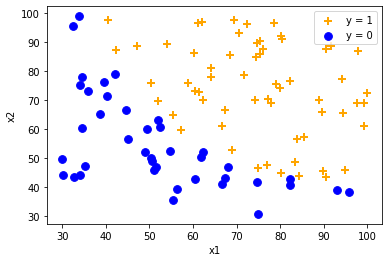

In [5]:
plotData(data, 'x1', 'x2', 'y = 1', 'y = 0')

In [6]:
m = data.shape[0]
n = data.shape[1] - 1
X = data[data.columns[0 : n]].values
Y = data[data.columns[n : n+1]].values

In [7]:
def sigmoid(z):
   s = 1 / (1 + np.exp(-z))
   return s

In [8]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros([dim, 1])
    b = 0.0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [9]:
X = X.T
print(X.shape)

(2, 100)


In [10]:
def propagate(w, b, X, Y):

    m = X.shape[1]
  
    A = sigmoid(np.dot(w.T, X) + b)
    cost = (-1 / m) * np.sum((Y * np.log(A)) + ((1-Y) * np.log(1-A)))

    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [11]:
w, b = initialize_with_zeros(X.shape[0])
grads, cost = propagate(w, b, X, Y.T)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))





dw = [[-12.00921659]
 [-11.26284221]]
db = -0.1
cost = 0.6931471805599453


In [12]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [13]:
params, grads, costs = optimize(w, b, X, Y.T, num_iterations= 1000000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 10000: 0.585027
Cost after iteration 20000: 0.547295
Cost after iteration 30000: 0.515402
Cost after iteration 40000: 0.488296
Cost after iteration 50000: 0.465105
Cost after iteration 60000: 0.445119
Cost after iteration 70000: 0.427768
Cost after iteration 80000: 0.412594
Cost after iteration 90000: 0.399233
Cost after iteration 100000: 0.387390
Cost after iteration 110000: 0.376827
Cost after iteration 120000: 0.367353
Cost after iteration 130000: 0.358811
Cost after iteration 140000: 0.351071
Cost after iteration 150000: 0.344025
Cost after iteration 160000: 0.337586
Cost after iteration 170000: 0.331678
Cost after iteration 180000: 0.326238
Cost after iteration 190000: 0.321212
Cost after iteration 200000: 0.316554
Cost after iteration 210000: 0.312226
Cost after iteration 220000: 0.308193
Cost after iteration 230000: 0.304425
Cost after iteration 240000: 0.300898
Cost after iteration 250000: 0.297588
Cost after iteration 26000

In [14]:
X = X.T

In [27]:
dw, db = grads['dw'], grads['db']

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


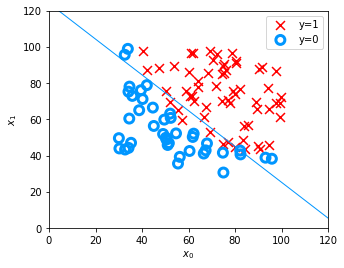

In [28]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 120, 0, 120])

pos_label="y=1"
neg_label="y=0"

neg = data['y'] == 0
pos = data['y'] == 1
# Plot examples
ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

#Plot the decision boundary
x0 = -db/dw[0]
x1 = -db/dw[1]
ax.plot([0,x0],[x1,0], c='#0096ff', lw=1)
plt.show()

array([60.18259939, 79.03273605, 61.10666454, 75.02474557, 76.0987867 ,
       84.43281996, 82.30705337, 69.36458876, 53.97105215, 69.07014406,
       70.66150955, 76.97878373, 89.67677575, 77.92409145, 62.27101367,
       80.19018075, 61.37928945, 85.40451939, 52.04540477, 64.17698887,
       83.90239366, 94.44336777, 77.19303493, 97.77159928, 62.0730638 ,
       91.5649745 , 79.94481794, 99.27252693, 90.54671411, 97.64563396,
       74.24869137, 71.79646206, 75.39561147, 40.45755098, 80.27957401,
       66.74671857, 64.03932042, 72.34649423, 60.45788574, 58.84095622,
       99.8278578 , 47.26426911, 50.4581598 , 88.91389642, 94.83450672,
       67.31925747, 57.23870632, 80.366756  , 68.46852179, 75.47770201,
       78.63542435, 94.09433113, 90.44855097, 74.49269242, 89.84580671,
       83.48916274, 42.26170081, 99.31500881, 55.34001756, 74.775893  ])